중앙대학교 사회과학대학 미디어커뮤니케이션학부

미디어인터페이스 봄학기 기말 프로젝트 결과보고서 

20182943 백선영

In [1]:
from pandas import Series, DataFrame 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows': 
    path = 'c:\Windows\Fonts\malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
elif platform.system() == "Linux":
    !apt -qq -y install fonts-nanum
    fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
    font = font_manager.FontProperties(fname=fontpath, size=9)
    rc('font', family='NanumBarunGothic') 
    font_manager._rebuild()
else:
    print("unknown system")

fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 43 not upgraded.


#1. 데이터 불러오기
인코딩 : euc-kr

수집방법및 데이터 설명 :

일차적으로 전국의 대기오염측정망에서 측정되는 아황산가스, 일산화탄소, 이산화질소, 오존, 미세먼지 등 대기오염도 자료를 수집·관리하는 국가대기오염정보관리시스템(NAMIS)을 구축하여 국가와 지방자치단체 등 행정기관에서 대기환경정책 자료로 활용할 수 있도록 정보를 제공 

최신성 및 신뢰성 : 기후환경본부 대기정책과 제공, 비정기(수시)로 갱신됨. 기후대기환경정보 서비스 (원본시스템) 

*시간 평균 대기오염도 정보의 경우 최근 7일까지만 데이터를 제공*

1)	서울시 년도별 평균 대기오염도 정보 (서울 열린데이터광장) _ CSV
https://data.seoul.go.kr/dataList/OA-2216/S/1/datasetView.do

2)	서울시 일별 평균 대기오염도 정보 (서울 열린데이터광장)_CSV
https://data.seoul.go.kr/dataList/OA-2218/S/1/datasetView.do

3)	서울시 월별 평균 대기오염도 정보 (서울 열린데이터 광장)_CSV
https://data.seoul.go.kr/dataList/OA-2217/S/1/datasetView.do

4) 서울시 시간 평균 대기오염도 정보(서울 열린데이터 광장)_CSV
https://data.seoul.go.kr/dataList/OA-2275/S/1/datasetView.do

각 파일을 다운받아서 구글 드라이브 마운트로 연결
(파일을 다시 킬 때마다 업로드하고 경로설정을 해야해서 약간 번거로운 작업이 필요함)


In [0]:
import pandas as pd
year = pd.read_csv('/서울시 년도별 평균 대기오염도 정보 (1).csv',encoding = 'euc-kr')
month = pd.read_csv('/서울시 월별 평균 대기오염도 정보.csv',encoding = 'euc-kr')
day = pd.read_csv('/서울시 일별 평균 대기오염도 정보 (1).csv',encoding = 'euc-kr')
time = pd.read_csv('/서울시 시간 평균 대기오염도 정보 (1).csv',encoding = 'euc-kr')

#2. 데이터 클리닝 :중복과 누락
시각화에 필요한 측정일시, 측정소명,이산화질소농도, 오존농도, 미세먼지, 초미세먼지만 가져왔다.
year : 2013년부터의 데이터를 가져옴
month : month19로 2019년도의 월별 데이터를 가져옴 ( 이후 시각화에서 2020년 기준의 데이터를 따로 가져왔음 / 동월대비 이산화질소 비교 시각화 )
day : 5월 한 달 간 데이터를 가져옴
time : 데이터 수집 시점 기준으로 7일간 데이터를 가져옴

따로 리스트를 만들어서 쓸모없어보이는 데이터를 제거한 month를 제외하고 나머지는 각 열의 평균치로 결측치를 채워넣었다.

In [0]:
year = year.iloc[:,[0,1,2,3,6,7]]
month = month.iloc[:,[0,1,2,3,6,7]]
day = day.iloc[:,[0,1,2,3,6,7]]
time = time.iloc[:,[0,1,2,3,6,7]]

In [0]:
year = year[year['측정년도'] >= 2013] #7년간 데이터 불러오기

In [6]:
year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정년도          350 non-null    int64  
 1   측정소명          350 non-null    object 
 2   이산화질소농도(ppm)  349 non-null    float64
 3   오존농도(ppm)     350 non-null    float64
 4   미세먼지(㎍/㎥)     350 non-null    float64
 5   초미세먼지(㎍/㎥)    350 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 19.1+ KB


In [7]:
year[year['이산화질소농도(ppm)'].isnull()]['측정소명'].unique() #자연사박물관 데이터가 하나 없음

array(['자연사박물관'], dtype=object)

In [0]:
year= year.fillna(value=year.mean(axis=0) ) #평균으로 채우기

In [9]:
year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정년도          350 non-null    int64  
 1   측정소명          350 non-null    object 
 2   이산화질소농도(ppm)  350 non-null    float64
 3   오존농도(ppm)     350 non-null    float64
 4   미세먼지(㎍/㎥)     350 non-null    float64
 5   초미세먼지(㎍/㎥)    350 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 19.1+ KB


In [0]:
del year['측정소명'] #년도에서 측정소명은 필요 없음
year = year.groupby('측정년도').mean() #측정년도를 기준으로 평균값내기

In [0]:
year.reset_index(level=['측정년도'], inplace = True) #인덱스 빼주기

In [12]:
year

,측정년도,이산화질소농도(ppm),오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,2013,0.038065,0.020109,47.217391,26.456522
1,2014,0.039850,0.020275,48.650000,25.725000
2,2015,0.038650,0.019575,47.775000,24.250000
3,2016,0.037564,0.020923,50.538462,26.743590
4,2017,0.035282,0.021769,47.256410,25.641026
5,2018,0.031609,0.021065,42.260870,23.695652
6,2019,0.031274,0.022980,42.840000,24.720000
7,2020,0.027980,0.025840,42.640000,23.800000


In [13]:
month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12372 entries, 0 to 12371
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정월           12372 non-null  int64  
 1   측정소명          12372 non-null  object 
 2   이산화질소농도(ppm)  11818 non-null  float64
 3   오존농도(ppm)     11556 non-null  float64
 4   미세먼지(㎍/㎥)     9960 non-null   float64
 5   초미세먼지(㎍/㎥)    3762 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 580.1+ KB


In [0]:
month19 = month[month['측정월']>=201900]

In [0]:
month19 = month19[month19['측정월'] < 202000]

In [16]:
month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12372 entries, 0 to 12371
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정월           12372 non-null  int64  
 1   측정소명          12372 non-null  object 
 2   이산화질소농도(ppm)  11818 non-null  float64
 3   오존농도(ppm)     11556 non-null  float64
 4   미세먼지(㎍/㎥)     9960 non-null   float64
 5   초미세먼지(㎍/㎥)    3762 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 580.1+ KB


In [17]:
month19.isnull().sum() #너무 많음

측정월              0
측정소명             0
이산화질소농도(ppm)    91
오존농도(ppm)       88
미세먼지(㎍/㎥)        1
초미세먼지(㎍/㎥)       1
dtype: int64

In [0]:
nanlist = month19[month19['이산화질소농도(ppm)'].isnull()]['측정소명'].unique() #큰 상관없는 측정소들, 그러나 강남구가 끼어있다.
#month19[month19['오존농도(ppm)'].isnull()]['측정소명'].unique() #오존농도 결측치의 측정소들도 이산화질소 농도와 유사함
nanlist = nanlist.tolist() #제거해줄 리스트

In [19]:
nanlist.remove('강남구')
nanlist

['자연사박물관',
 '강남구청1(SGA)',
 '강남구청2(랩코)',
 '강남구청3(센트리)',
 '공사장1(삼성병원)',
 '공사장2(신문로)',
 '공사장3(효제동)',
 '공사장4(저동2지구)',
 '공사장5(효제동)',
 '공사장6(세운재정비촉진지구)',
 '공사장7',
 '공원1(종묘)',
 '공원2(경희궁)',
 '도로변1(광화문역)',
 '도로변10(종로5가-2)',
 '도로변2(종로5가)',
 '도로변3(종각역)',
 '도로변4(을지로입구역)',
 '도로변5(명동역)',
 '도로변6(종로3가역)',
 '도로변7(충무로역)',
 '도로변8(경복궁역)',
 '도로변9(동대문역사공원역)',
 '시장1(통인시장)',
 '시장2(남대문시장)',
 '시장3(중부시장)',
 '시장4(방산시장)',
 '시장5(동대문쇼핑센터)',
 '을지로(금속)',
 '을지인쇄골목1(인쇄골목)',
 '을지인쇄골목2(인쇄골목)',
 '청계천(청계천로)',
 '파출소1(태평로)',
 '파출소2(명동)',
 '학교1(덕수초)',
 '학교2(재동초)',
 '학교3(운현초)',
 '학교4(금화초)',
 '학교5(효제초)',
 '학교6(충무초)',
 '학교7(창덕여중)',
 '학교8(덕성여중)']

In [0]:
#측정소명이 nanlist에 있는 것들 제거
remove = month19['측정소명'].isin(nanlist) 
month19 = month19[~remove]

In [21]:
month19[month19['미세먼지(㎍/㎥)'].isnull()]['측정소명'] #관악구에서도 결측치 있음


539    관악구
Name: 측정소명, dtype: object

In [0]:
month19 = month19.fillna(value=month19.mean(axis=0) ) #결측치 모두 평균치로 변경

In [23]:
month19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 576 entries, 300 to 965
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정월           576 non-null    int64  
 1   측정소명          576 non-null    object 
 2   이산화질소농도(ppm)  576 non-null    float64
 3   오존농도(ppm)     576 non-null    float64
 4   미세먼지(㎍/㎥)     576 non-null    float64
 5   초미세먼지(㎍/㎥)    576 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [24]:
month19.isnull().sum()

측정월             0
측정소명            0
이산화질소농도(ppm)    0
오존농도(ppm)       0
미세먼지(㎍/㎥)       0
초미세먼지(㎍/㎥)      0
dtype: int64

In [25]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19257 entries, 0 to 19256
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          19257 non-null  int64  
 1   측정소명          19257 non-null  object 
 2   이산화질소농도(ppm)  17467 non-null  float64
 3   오존농도(ppm)     17530 non-null  float64
 4   미세먼지(㎍/㎥)     18657 non-null  float64
 5   초미세먼지(㎍/㎥)    18663 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 902.8+ KB


In [0]:
day = day[day['측정일시'] >= 20200000]

In [27]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8124 entries, 0 to 8123
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          8124 non-null   int64  
 1   측정소명          8124 non-null   object 
 2   이산화질소농도(ppm)  8074 non-null   float64
 3   오존농도(ppm)     8081 non-null   float64
 4   미세먼지(㎍/㎥)     8086 non-null   float64
 5   초미세먼지(㎍/㎥)    8088 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 444.3+ KB


In [0]:
day = day[day['측정일시'] >= 20200500]

In [0]:
day = day[day['측정일시'] <= 20200531]

In [30]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1550 entries, 650 to 2199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          1550 non-null   int64  
 1   측정소명          1550 non-null   object 
 2   이산화질소농도(ppm)  1549 non-null   float64
 3   오존농도(ppm)     1549 non-null   float64
 4   미세먼지(㎍/㎥)     1549 non-null   float64
 5   초미세먼지(㎍/㎥)    1549 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 84.8+ KB


In [0]:
day[day['미세먼지(㎍/㎥)'].isnull()]['측정소명'].unique() #결측치 : 5월 24일 중구
day[day['측정소명']=='중구']
day = day.fillna(value=day.mean(axis=0) ) #평균값으로 데이터 채우기

In [32]:
day.isnull().sum()

측정일시            0
측정소명            0
이산화질소농도(ppm)    0
오존농도(ppm)       0
미세먼지(㎍/㎥)       0
초미세먼지(㎍/㎥)      0
dtype: int64

In [33]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          4200 non-null   int64  
 1   측정소명          4200 non-null   object 
 2   이산화질소농도(ppm)  4169 non-null   float64
 3   오존농도(ppm)     4169 non-null   float64
 4   미세먼지(㎍/㎥)     4086 non-null   float64
 5   초미세먼지(㎍/㎥)    4159 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 197.0+ KB


In [34]:
time['측정일시']

0       202006101300
1       202006100400
2       202006111100
3       202006110400
4       202006110000
            ...     
4195    202006141700
4196    202006141600
4197    202006141500
4198    202006141900
4199    202006141400
Name: 측정일시, Length: 4200, dtype: int64

In [0]:
time[time['이산화질소농도(ppm)'].isnull()]['측정소명'].unique()
#대체로 중요한 측정소들이므로 평균으로 바꾸기
time=time.fillna(value=day.mean(axis=0) ) 

In [36]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          4200 non-null   int64  
 1   측정소명          4200 non-null   object 
 2   이산화질소농도(ppm)  4200 non-null   float64
 3   오존농도(ppm)     4200 non-null   float64
 4   미세먼지(㎍/㎥)     4200 non-null   float64
 5   초미세먼지(㎍/㎥)    4200 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 197.0+ KB


## 4. 질문 및 시각화
- 분포(distribution): 히스토그램, 박스 플롯
    - (1) 2020년 5월 한 달 간 미세먼지는 어떤 분포를 그리는가? 
    - (2) 2019년 측정소별 오존 분포는 어떠한가?

- 순서/정렬/순위(order/sort/rank): 수직막대그래프, 수평막대그래프
    - (3) 2019년 측정소별 미세먼지량 순위는 어떻게 되는가?
    - (5) 2020년 5월 총 이산화질소농도는 2019년 동월대비 얼마나 차이가 나는가? 

- 구성(composition): 100%누적 막대그래프, 기울기 차트
     - (5)	2019년 계절 별 미세먼지 총량의 차이가 어떻게 되는가?
     - (6)	2019년 월별 미세먼지 나쁨과 매우나쁨의 비율이 어떻게 되는가? 

- 추세(growth/trend): 선 차트
     - (7) 미세먼지 연평균 증감 추세가 어떻게 되는가
     - (8) 전체 미세먼지 대비 미세먼지가 가장 높은 측정소의 미세먼지 비율 (2019년 월별)
     - (9) 전체 이산화질소 대비 이산화질소가 가장 높은 측정소의 이산화질소 비율 (2019년 월별)

- 관계(relationship): 산점도, 버블 차트
    - (10) 하루 간 미세먼지와 시간 흐름 간 상관관계
    - (11) 미세먼지와 요일 간 상관관계
    - (12) 이산화질소와 미세먼지의 상관관계


*데이터 시각화 과정에서 같은 데이터(year, month, day, time)를 기준으로 다뤄서 시각화 종류에 따라 나열하지 못했습니다.*


#YEAR 시각화
#(7) 미세먼지 연평균 증감 추세가 어떻게 되는가?
 A : 2016년 최고치찍고 2018년까지 감소

 얼핏 보면 차이가 엄청나게 많이 나는 것처럼 보이지만 미세먼지 측정치를 보면 
 보이는 것만큼 큰 차이도 아니다. (선그래프와 막대그래프의 차이)

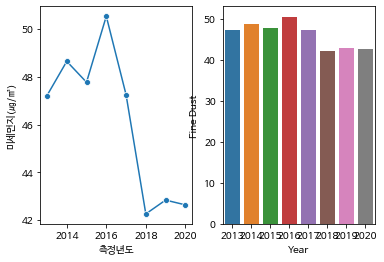

In [37]:
fig, ax = plt.subplots(nrows = 1 , ncols = 2)

sns.lineplot(x = '측정년도', 
             y = '미세먼지(㎍/㎥)', 
             estimator = sum,
             data = year,
            marker = 'o',
             ax = ax[0])

sns.barplot(x = '측정년도', 
             y = '미세먼지(㎍/㎥)', 
             estimator = sum,
             data = year,
            ax = ax[1])


plt.xlabel('Year')
plt.ylabel('Fine Dust')
#ax.set_labels(xlabel = 'Year',ylabel = 'Fine Dust')

plt.show()

# MONTH18 시각화

In [0]:
month19.reset_index(drop = True, inplace = True)

In [39]:
month19.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,201912,강남구,0.037,0.010,43.0,29.0
1,201912,강남대로,0.045,0.006,48.0,28.0
2,201912,강동구,0.037,0.009,49.0,36.0
3,201912,강변북로,0.045,0.007,51.0,33.0
4,201912,강북구,0.039,0.014,47.0,32.0


#(2) 2019년 측정소별 오존 분포는 어떠한가?


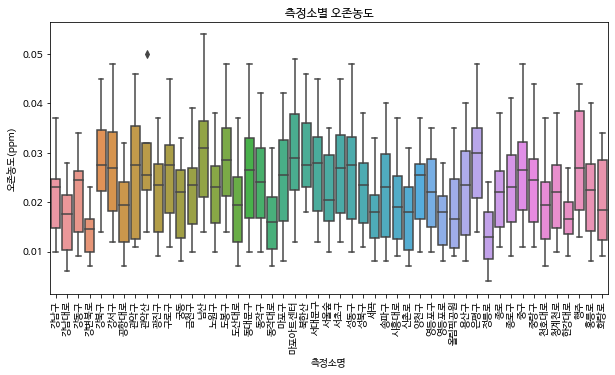

In [40]:
fig,ax = plt.subplots(figsize = (10,5))
sns.boxplot( x = '측정소명', y = '오존농도(ppm)', 
            data = month19, ax = ax)
ax.set_title("측정소별 오존농도")
plt.xticks(rotation = 90)
plt.show()


#(3) 2019년 측정소별 미세먼지량 순위는 어떻게 되는가?
홍릉로와 한강대로 등에 미세먼지가 가장 많음

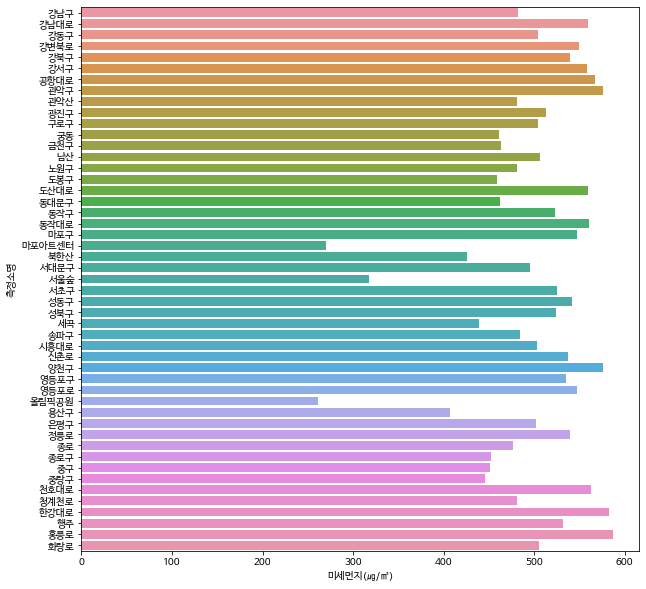

In [41]:
fig, ax = plt.subplots(figsize=(10,10))

sns.barplot(y = '측정소명', x = '미세먼지(㎍/㎥)',data = month19, estimator = sum,
            ci = None, ax = ax, orient = 'h')

plt.show()

#(4) 2020년 5월 총 이산화질소농도는 2019년 동월대비 얼마나 차이가 나는가?
A: 2019년 이산화질소량이 훨씬 **많음** 

In [42]:
month20 = month[month['측정월'] == 202005]
month20.isnull().sum()
month20.reset_index(drop = True, inplace = True)
month20.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,202005,강남구,0.022,0.035,31.0,18.0
1,202005,강남대로,0.034,0.024,37.0,17.0
2,202005,강동구,0.019,0.033,33.0,18.0
3,202005,강변북로,0.036,0.026,40.0,16.0
4,202005,강북구,0.014,0.027,36.0,18.0


In [43]:
month1905 = month19[month19['측정월']== 201905].reset_index(drop = True)
month1905.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,201905,강남구,0.025,0.037,44.0,26.0
1,201905,강남대로,0.057,0.028,66.0,33.0
2,201905,강동구,0.030,0.034,48.0,27.0
3,201905,강변북로,0.061,0.020,66.0,34.0
4,201905,강북구,0.020,0.045,53.0,26.0


In [0]:
month1920 = pd.merge(month20, month1905, how = 'outer') #19년도 20년도 5월달 데이터

In [45]:
month1920.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,202005,강남구,0.022,0.035,31.0,18.0
1,202005,강남대로,0.034,0.024,37.0,17.0
2,202005,강동구,0.019,0.033,33.0,18.0
3,202005,강변북로,0.036,0.026,40.0,16.0
4,202005,강북구,0.014,0.027,36.0,18.0


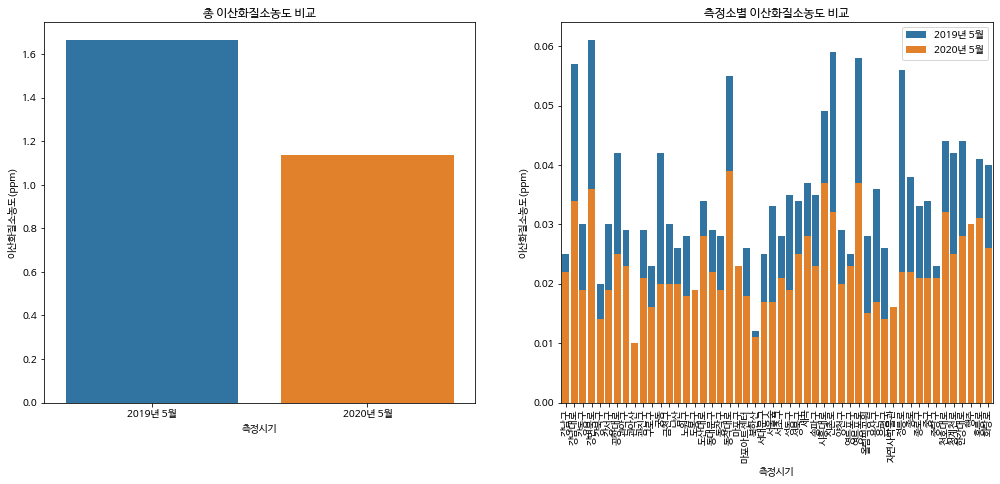

In [46]:
#2019년 동월대비 2020년 5월 이산화질소량
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (17,7))

sns.barplot( x = '측정월',y = '이산화질소농도(ppm)',  data = month1920,
            estimator = sum , ax = ax[0], ci = None)


sns.barplot( x = '측정소명',y = '이산화질소농도(ppm)', hue = '측정월', data = month1920,
            ax = ax[1], ci = None, dodge = False)
plt.xticks(rotation = 90)

ax[1].legend(labels = ["2019년 5월","2020년 5월"])
ax[0].set(title ="총 이산화질소농도 비교", ylabel = '이산화질소농도(ppm)', xlabel = '측정시기')
ax[1].set(title ="측정소별 이산화질소농도 비교", ylabel = '이산화질소농도(ppm)', xlabel = '측정시기')
ax[0].set_xticklabels(['2019년 5월','2020년 5월'])

plt.show()

#(5) 2019년 계절 별 미세먼지 총량의 차이가 어떻게 되는가?
A : 겨울 > 봄 > 여름 > 가을
cf. 계절별 대기오염 정도 변화
-> 따뜻할 때 오존 증가, 추울 때 이산화질소 증가



In [47]:
month19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정월           576 non-null    int64  
 1   측정소명          576 non-null    object 
 2   이산화질소농도(ppm)  576 non-null    float64
 3   오존농도(ppm)     576 non-null    float64
 4   미세먼지(㎍/㎥)     576 non-null    float64
 5   초미세먼지(㎍/㎥)    576 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 27.1+ KB


In [48]:
#계절 칼럼 넣기
a = month19[month19['측정월']>=201903][month19['측정월']<=201905].sum()
b = month19[month19['측정월']>=201906][month19['측정월']<=201908].sum()
c = month19[month19['측정월']>=201908][month19['측정월']<=201910].sum()
d = pd.merge(month19[month19['측정월']>=201910],month19[month19['측정월']<=201902],how = 'outer').sum()
season = pd.concat([a,b,c,d], axis=1)
season = season.iloc[2:6,:]
season.columns = ['봄','여름','가을','겨울']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [49]:
season

,봄,여름,가을,겨울
이산화질소농도(ppm),4.918,3.408,3.56024,8.503
오존농도(ppm),4.328,4.446,3.27981,3.345
미세먼지(㎍/㎥),7900,4124,3884.3,11233
초미세먼지(㎍/㎥),4487,2718,2140.72,6438


In [50]:
season.values.tolist()

[[4.917999999999998, 3.407999999999996, 3.560238260869561, 8.502999999999997],
 [4.3279999999999985,
  4.445999999999998,
  3.2798121739130415,
  3.3449999999999935],
 [7900.0, 4124.0, 3884.304347826087, 11233.0],
 [4487.0, 2718.0, 2140.7234782608693, 6438.0]]

In [0]:
season = season.transpose() #컬럼이랑 인덱스 바꾸기

In [0]:
season
season.reset_index(inplace = True) #계절 인덱스 컬럼으로 빼내기

In [53]:
season

,index,이산화질소농도(ppm),오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,봄,4.918,4.328,7900,4487
1,여름,3.408,4.446,4124,2718
2,가을,3.56024,3.27981,3884.3,2140.72
3,겨울,8.503,3.345,11233,6438


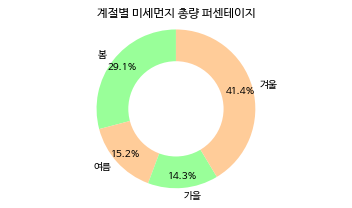

In [54]:
fig, ax = plt.subplots(figsize = (5, 3))

labels = ['봄', '여름','가을','겨울']

ax.pie(season['미세먼지(㎍/㎥)'], 
       labels = labels, 
       autopct = '%1.1f%%',
        pctdistance=0.85, # 중심으로부터의 거리
      startangle = 90, 
       colors = ['#99ff99','#ffcc99']) # 색깔 지정

ax.set(title = "계절별 미세먼지 총량 퍼센테이지")

# 흰 원 그리기
ax.add_artist(plt.Circle((0,0),0.60,fc='white'))

ax.axis('equal')  
plt.tight_layout()

plt.show()

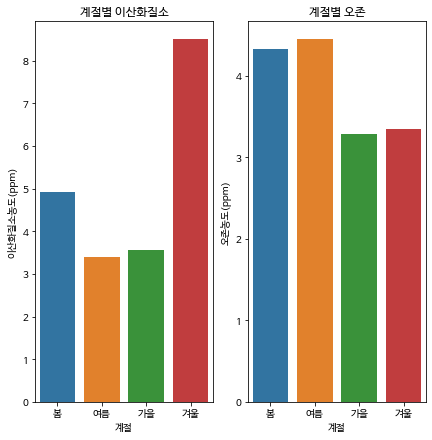

In [55]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,7))

sns.barplot( x = 'index',y = '이산화질소농도(ppm)',  data = season,  ax = ax[0], ci = None)
ax[0].set(title='계절별 이산화질소',xlabel = '계절')

sns.barplot( x = 'index',y = '오존농도(ppm)',  data = season,  ax = ax[1], ci = None)
ax[1].set(title = '계절별 오존', xlabel = '계절')


plt.show()

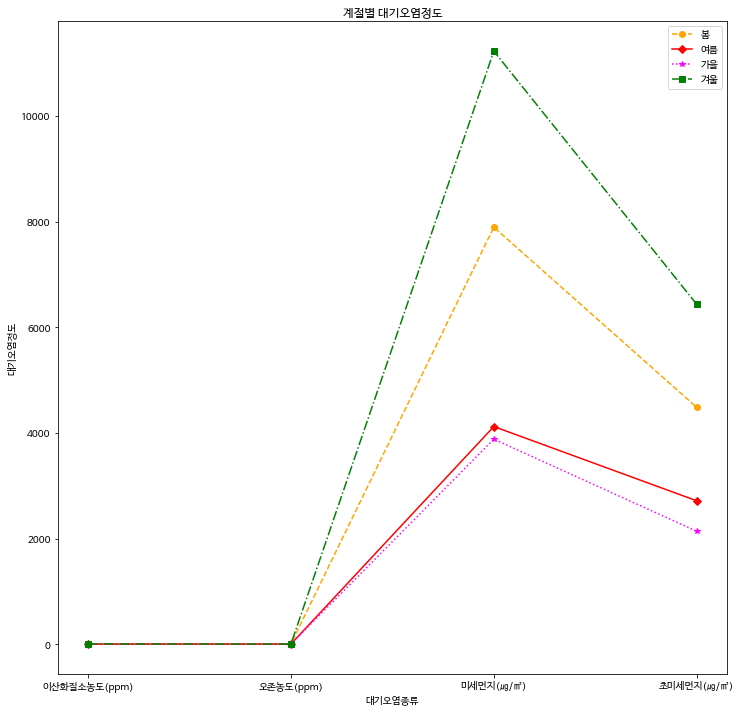

In [56]:
#계절별로 대기오염 정보 변화
fig, ax = plt.subplots(figsize = (12,12))

ax.plot(season.iloc[0, 1:], color = 'orange', marker = 'o', linestyle = '--')
ax.plot(season.iloc[1, 1:], color = 'red', marker = 'D', linestyle = '-')
ax.plot(season.iloc[2, 1:], color = 'magenta', marker = '*', linestyle = ':')
ax.plot(season.iloc[3, 1:], color = 'green', marker = 's', linestyle = '-.')

ax.set(title = '계절별 대기오염정도', 
       xlabel = '대기오염종류',
      ylabel = '대기오염정도')

#ax.set_xticklabels(['봄', 2017, 2018, 2019])
ax.legend(season['index'], loc = 'upper right')
plt.show()

#(6) 2019년 미세먼지 나쁨과 매우나쁨의 비율이 어떻게 되는가?
A: 나쁨과 매우나쁨 포함 58% 

In [0]:
month19['나쁨'] = month19['미세먼지(㎍/㎥)'] >= 36

In [58]:
month19.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),나쁨
0,201912,강남구,0.037,0.010,43.0,29.0,True
1,201912,강남대로,0.045,0.006,48.0,28.0,True
2,201912,강동구,0.037,0.009,49.0,36.0,True
3,201912,강변북로,0.045,0.007,51.0,33.0,True
4,201912,강북구,0.039,0.014,47.0,32.0,True


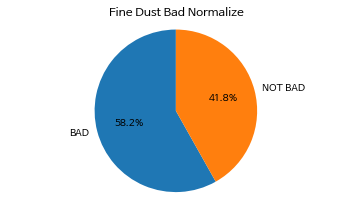

In [59]:
fig, ax = plt.subplots(figsize = (5, 3))

labels = ['BAD', 'NOT BAD']

ax.pie(month19['나쁨'].value_counts(normalize = True), 
       labels = labels, 
       autopct = '%1.1f%%', # 숫자 표시방법
      startangle = 90) # 시작하는 각도

ax.set(title = "Fine Dust Bad Normalize")

ax.axis('equal') # 찌그러지지 않은 원 
plt.tight_layout() # default layout

plt.show()

#(8) 전체 미세먼지 대비 미세먼지가 가장 높은 측정소의 미세먼지 비율(2019년 월별)
A : 적게는 2.5, 많게는 3.7% 차지 (일반 평균 미세먼지비율 : 2%)
6월과 9월즈음에 미세먼지 최댓값이 높아짐


In [60]:
month19.head()

,측정월,측정소명,이산화질소농도(ppm),오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥),나쁨
0,201912,강남구,0.037,0.010,43.0,29.0,True
1,201912,강남대로,0.045,0.006,48.0,28.0,True
2,201912,강동구,0.037,0.009,49.0,36.0,True
3,201912,강변북로,0.045,0.007,51.0,33.0,True
4,201912,강북구,0.039,0.014,47.0,32.0,True


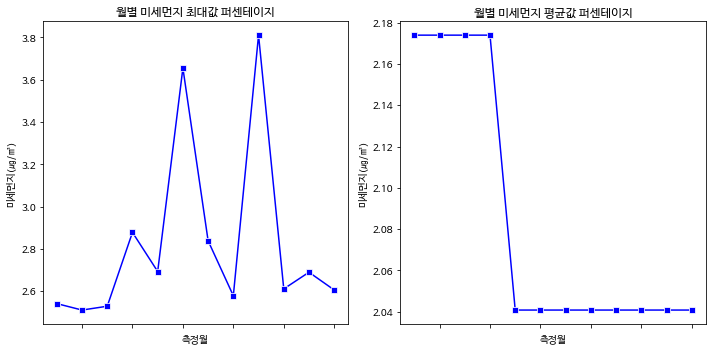

In [62]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5))

c1 = sns.lineplot( x = '측정월',y = '미세먼지(㎍/㎥)', data = month19,
            estimator = lambda x : max(x) / sum(x) *100 ,marker = 's', color = 'blue',
            ax = ax[0], ci = None )
ax[0].set(title = '월별 미세먼지 최대값 퍼센테이지')

c1.set_xticklabels(c1.get_xticklabels(), rotation=90)

c2 = sns.lineplot( x = '측정월',y = '미세먼지(㎍/㎥)', data = month19,
            estimator = lambda x : np.mean(x) / sum(x) * 100,marker = 's', color = 'blue',
            ax = ax[1], ci = None)
ax[1].set(title = '월별 미세먼지 평균값 퍼센테이지')
c2.set_xticklabels(c2.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

#(9) 전체 이산화질소 대비 이산화질소가 가장 높은 측정소의 이산화질소 비율 (2019년 월별)
A : 보통 3%, 많게는 5%가까이 ( 일반 평균 측정치 : 2% )

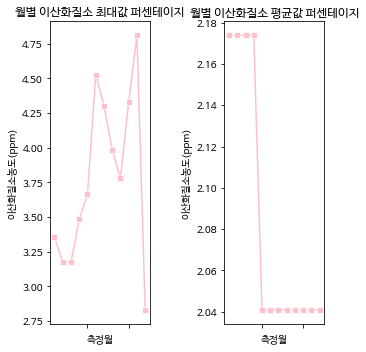

In [63]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (5,5))
c1 = sns.lineplot( x = '측정월',y = '이산화질소농도(ppm)', data = month19,
            estimator = lambda x : max(x) / sum(x) *100 ,marker = 's', color = 'pink',
            ax = ax[0], ci = None)
ax[0].set(title = '월별 이산화질소 최대값 퍼센테이지')
c1.set_xticklabels(c1.get_xticklabels(), rotation=90)

c2 = sns.lineplot( x = '측정월',y = '이산화질소농도(ppm)', data = month19,
            estimator = lambda x : np.mean(x) / sum(x) * 100,marker = 's', color = 'pink',
            ax = ax[1], ci = None)
ax[1].set(title = '월별 이산화질소 평균값 퍼센테이지')
c2.set_xticklabels(c2.get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

#(12)이산화질소와 미세먼지의 상관관계
A : 별 상관 없어보인다. 굳이 말하자면 정의 관계로 볼 수 있으나 명확한 관계로는 보이지 않는다. 

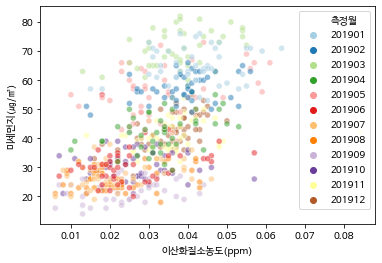

In [64]:
fig, ax = plt.subplots()

sns.scatterplot(x = '이산화질소농도(ppm)', 
                y = '미세먼지(㎍/㎥)', 
                hue = '측정월',
                data = month19, 
                alpha = 0.5,
                ax = ax, palette = 'Paired')
plt.show()

#시각화 DAY

#(1) 2020년 5월 한 달 간 미세먼지는 어떤 분포를 그리는가?
A : 30~40사이가 가장 많음

**Q. 5월 한 달 간 어떤 날에 미세먼지의 최댓값과 최솟값은?**

A : 11일에 가장 많았음. 20일 제일 적음  
11일 중국발 황사


In [65]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1550 entries, 650 to 2199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          1550 non-null   int64  
 1   측정소명          1550 non-null   object 
 2   이산화질소농도(ppm)  1550 non-null   float64
 3   오존농도(ppm)     1550 non-null   float64
 4   미세먼지(㎍/㎥)     1550 non-null   float64
 5   초미세먼지(㎍/㎥)    1550 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 84.8+ KB


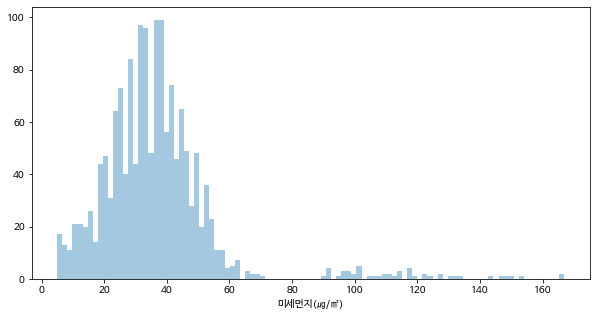

In [66]:
fig, ax = plt.subplots(figsize = (10,5))
sns.distplot( a = day['미세먼지(㎍/㎥)'], bins = 100, rug = False, kde = False)
plt.show() 

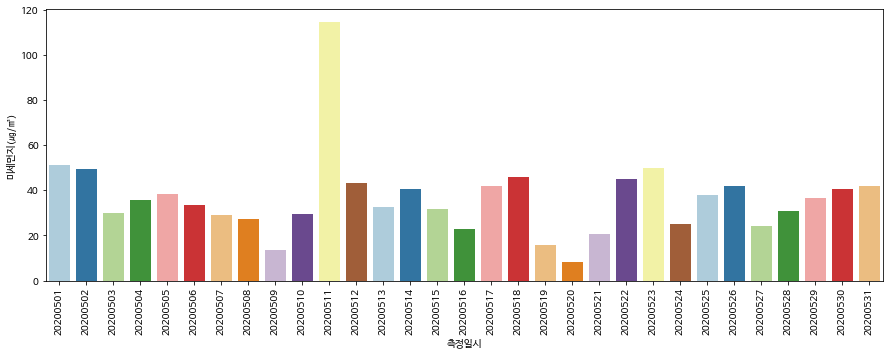

In [67]:
fig, ax = plt.subplots(figsize = (15,5))

sns.barplot(x = '측정일시', y = '미세먼지(㎍/㎥)', estimator = np.mean, data = day, ci = None, ax = ax, palette = 'Paired')
#sns.lineplot(x = '측정일시', y = '초미세먼지(㎍/㎥)', estimator = np.mean,data = day, ci = None, ax = ax, palette = 'Paired')
plt.xticks(rotation = 90)
plt.show()

#(11) 미세먼지와 요일 간 상관관계
A : 월요일에 가장 많고 수요일에 가장 적음

버블차트가 생각보다 애매하게 나와서 총량 비교와 박스플롯도 함께 넣었습니다.

In [68]:
day

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
650,20200531,강남구,0.016,0.059,38.0,30.0
651,20200531,강남대로,0.028,0.047,39.0,26.0
652,20200531,강동구,0.018,0.053,42.0,32.0
653,20200531,강변북로,0.037,0.049,47.0,29.0
654,20200531,강북구,0.012,0.049,46.0,33.0
...,...,...,...,...,...,...
2195,20200501,청계천로,0.017,0.036,54.0,33.0
2196,20200501,한강대로,0.020,0.035,60.0,35.0
2197,20200501,행주,0.030,0.041,52.0,28.0
2198,20200501,홍릉로,0.024,0.043,51.0,29.0


In [0]:
from datetime import date
day['측정일시'] = day['측정일시'].astype(str)

In [0]:
day['측정일시'] = pd.to_datetime(day['측정일시'], format = '%Y%m%d')

In [0]:
day['요일'] = day['측정일시'].dt.day_name()

In [72]:
day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1550 entries, 650 to 2199
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   측정일시          1550 non-null   datetime64[ns]
 1   측정소명          1550 non-null   object        
 2   이산화질소농도(ppm)  1550 non-null   float64       
 3   오존농도(ppm)     1550 non-null   float64       
 4   미세먼지(㎍/㎥)     1550 non-null   float64       
 5   초미세먼지(㎍/㎥)    1550 non-null   float64       
 6   요일            1550 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 136.9+ KB


In [73]:
!pip install plotly
import plotly

In [0]:
import plotly.express as px

In [0]:
w = day.groupby(['요일']).sum()
w = w.reindex(index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
wlist = w['미세먼지(㎍/㎥)'].tolist()

In [76]:
fig = px.scatter(data_frame=day, x='미세먼지(㎍/㎥)', y='요일', color='요일', 
                  size='미세먼지(㎍/㎥)', size_max=50)
fig.show()

In [77]:
import plotly.graph_objects as go
# 파이 차트
colors = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

fig = go.Figure(data=[go.Pie(labels=['Mon','Tues','Wedn','Thu','Fri','Sat','Sun'],
                             values= wlist)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
#영역 경계들 나누는 검정선들
fig.show()

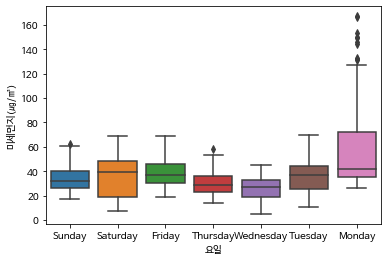

In [78]:
fig, ax = plt.subplots()

sns.boxplot(x = '요일', 
                y = '미세먼지(㎍/㎥)', 
                data = day, 
                
                ax = ax)
plt.show()

#시각화 TIME

#(10) 하루 간 미세먼지와 시간 흐름 간 상관관계
A : 8시 기점으로 미세먼지량이 올라가고 다시 5시 기준으로 내려감 ( 출근과 퇴근 )

In [79]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   측정일시          4200 non-null   int64  
 1   측정소명          4200 non-null   object 
 2   이산화질소농도(ppm)  4200 non-null   float64
 3   오존농도(ppm)     4200 non-null   float64
 4   미세먼지(㎍/㎥)     4200 non-null   float64
 5   초미세먼지(㎍/㎥)    4200 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 197.0+ KB


In [0]:
time['측정일시'].unique()
time['측정일시'] =time['측정일시']%10000 / 100


In [0]:
time['측정일시'] = time['측정일시'].astype(int)

In [82]:
time.head()

,측정일시,측정소명,이산화질소농도(ppm),오존농도(ppm),미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
0,13,강남구,0.02231,0.032976,36.477082,18.948999
1,4,강남구,0.04000,0.015000,45.000000,26.000000
2,11,강남구,0.01700,0.037000,26.000000,18.000000
3,4,강남구,0.01400,0.016000,24.000000,16.000000
4,0,강남구,0.02400,0.015000,23.000000,17.000000


In [0]:
time = time.groupby(['측정일시']).sum()

In [0]:
time.reset_index(level = ['측정일시'],inplace = True)

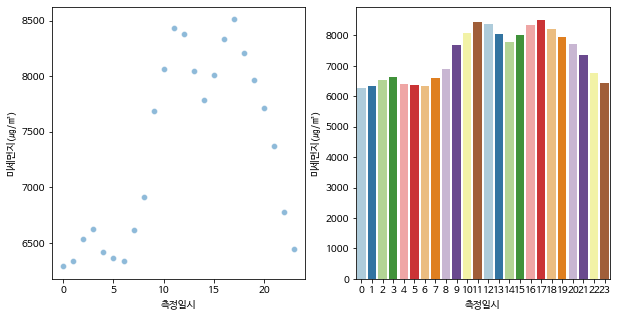

In [85]:
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize = (10,5))

sns.scatterplot(x = '측정일시', 
                y = '미세먼지(㎍/㎥)', 
                data =time, 
                alpha = 0.5, 
                ax = ax[0], palette = 'Paired')

sns.barplot(x = '측정일시', 
                y = '미세먼지(㎍/㎥)', 
                data =time, 
                #alpha = 0.5,
                ax = ax[1], palette = 'Paired')

plt.show()

#5.도전적이었던 부분 3가지
#1) 클리닝 과정 중 결측치 처리
 클리닝 과정에서 중요한 측정치였으나 측정일시, 측정소의 구분없이 거의 랜덤하게 빠진 데이터가 있었습니다. (특히 month데이터) 그래서 2019년도가 아닌 비교적 결측치가 적은 2018년, 2017년으로 수정할 방안을 구상했었습니다. 그러나 시의성 측면에서 2019년을 포기할 수 없었고 각 컬럼의 평균치를 넣는 방안으로 보완했습니다.

#2) 시각화 오류 
 계절과 관련된 데이터를 사용하려고 따로 데이터프레임을 합산하고 만드는 과정에서 계절 인덱스를 reset_index(level)로 컬럼으로 빼내었으며 컬럼명을 '계절'로 바꿨었습니다. 그러나 시각화과정에서 계절컬럼을 프로그램이 인식하지 않아 제대로 된 시각화가 만들어지지 않았었습니다.
인덱스를 따로 기준으로 두는 법도 몰랐고 이해가 안돼서 찾아보니 , reset_index(level)로 만든 컬럼은 컬럼이 아니라 그냥 인덱스 그대로고 보이는 것만 컬럼과 같았습니다(적어도 제가 해석한 stackoverflow에서는 그랬습니다). 그래서 그냥 인덱스로만 두고 계절로 이름을 바꾸지 않았더니 제대로 시각화가 만들어졌습니다.
(이유는 사실 아직도 잘 모르겠습니다..)

#3) 자료의 해석
 5월 11일 급증한 미세먼지의 해석에 관해 등교, 이태원 클럽관련 코로나 사태 등을 생각했었으나 실질적으로 관련이 없음을 확인했습니다. 어떤 식으로 해석해야 할 지 몰랐으나 미세먼지관련 사이트 Dustfeel을 통해 황사와 관련된 것임을 확인했습니다.

https://dustfeel.com/forecast/2020-05-11
*※ 오늘(11일) 중국 고비사막과 내몽골고원에서 발원한 황사는 내일(12일) 중서부지역을 중심으로 PM10 농도를 높일 가능성이 있으나, 기류 흐름에 따라 국내 영향 농도 및 권역에 변동 가능성이 있으니 발표되는 예보를 참고 바람.*

아쉬운 점은 대기오염 발생 원인을 염두해두고 자료를 선정하고 본 시각화를 진행했었다면, 대기오염에 대한 인지와 어떤 노력을 해야할지 등을 더 알 수 있지 않았을까합니다.